In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *
from utils_evaluation import *
from utils_plotting import *

In [3]:
sns.set(style='ticks')

# Read data

In [4]:
sdss = pd.read_csv('/media/snakoneczny/data/SDSS/SDSS.DR14.cols.csv')
sdss = clean_sdss(sdss)

Cleaning SDSS: 4151126 left


In [5]:
sdss_x_gaia = pd.read_csv('/media/snakoneczny/data/SDSS/SDSS.DR14.x.GAIA.DR2.cols.csv')
sdss_x_gaia = clean_sdss(sdss_x_gaia)

Cleaning SDSS: 1426995 left


In [6]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 49)
Droping NANs: 89513 (98.02%) left
Removing errors bigger than 1: 84491 (92.52%) left
Removing limiting magnitudes: 74191 (81.25%) left
Removing IMA flags: 55787 (61.09%) left
Cleaning SDSS: 52010 left
Removing R > 22: 51752 left


In [7]:
kids_x_sdss_x_gaia = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.x.GAIA.DR2.cols.csv',
                                  sdss_cleaning=True, cut='r')

Data shape: (35267, 68)
Droping NANs: 35106 (99.54%) left
Removing errors bigger than 1: 34803 (98.68%) left
Removing limiting magnitudes: 34327 (97.33%) left
Removing IMA flags: 24197 (68.61%) left
Cleaning SDSS: 23172 left
Removing R > 22: 23169 left


# Describe data

In [8]:
describe_column(sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([2541424,  680843,  928859]),
 array([ 61.22252131,  16.40140531,  22.37607338]))

In [9]:
describe_column(sdss_x_gaia['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([336129, 361138, 729728]),
 array([ 23.55502297,  25.30758692,  51.13739011]))

In [10]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([32547,  7061, 12144]),
 array([ 62.89032308,  13.64391714,  23.46575978]))

In [11]:
describe_column(kids_x_sdss_x_gaia['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([ 6993,  5330, 10846]),
 array([ 30.18257154,  23.00487721,  46.81255125]))

# SDSS x GAIA

5 position shape: (992384, 27)


/home/snakoneczny/workspace/kids_quasars/utils.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return data


Removing paralax_error shape: (867941, 30)
Removing pmra_error shape: (721039, 30)
Removing pmdec_error shape: (702355, 30)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  3784, 138428, 560143]), array([  0.53875889,  19.70912146,  79.75211965]))
QSO:


,parallax,pmra,pmdec
mu,-0.0172845,-0.0209419,-0.0258889
median,-0.0262785,-0.0106862,0.00750385
sigma,0.517696,1.71207,1.81492


GALAXY:


,parallax,pmra,pmdec
mu,0.156374,-0.699663,-2.49742
median,0.108192,-0.123484,-0.633517
sigma,1.18417,5.6863,6.66779


STAR:


,parallax,pmra,pmdec
mu,0.710942,-1.80905,-6.37026
median,0.38428,-1.12754,-4.21969
sigma,1.38027,11.9131,10.8621


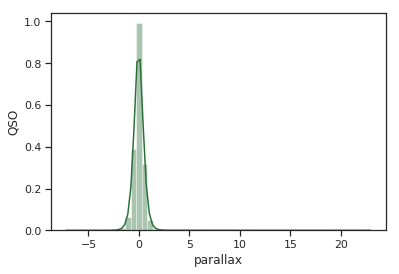

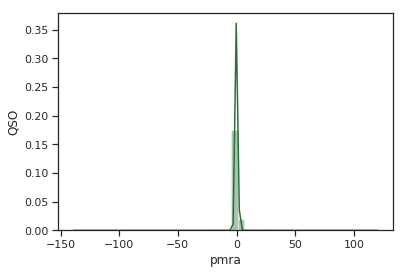

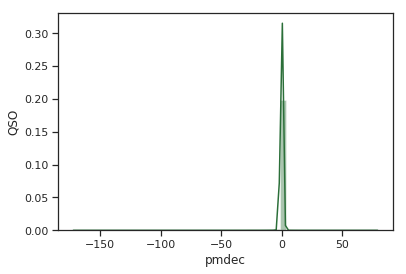

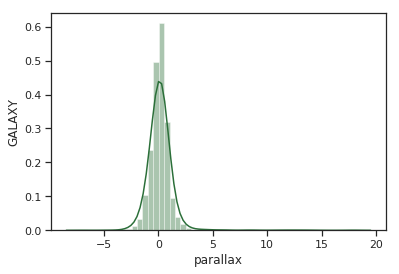

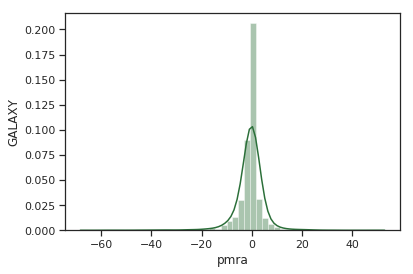

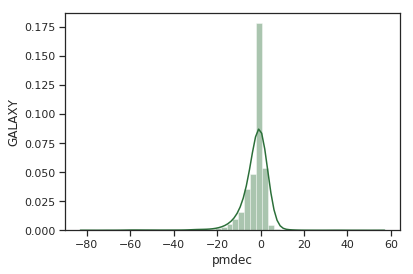

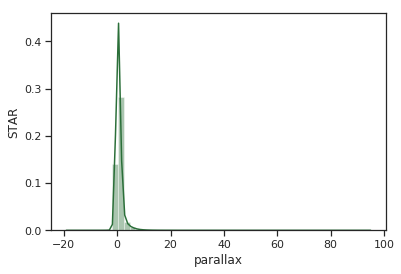

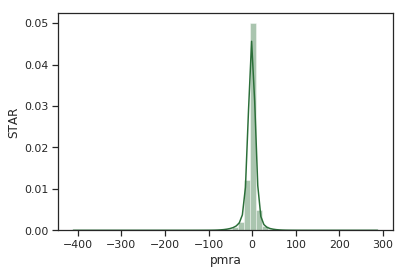

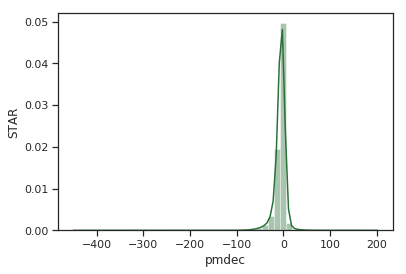

In [23]:
sdss_x_gaia_clean = process_gaia(sdss_x_gaia, parallax_error=1, pm_error=1)
print(describe_column(sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(sdss_x_gaia_clean)

# KiDS x SDSS x GAIA

5 position shape: (14407, 78)
Removing paralax_error shape: (12472, 81)
Removing pmra_error shape: (9506, 81)
Removing pmdec_error shape: (9435, 81)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  78, 2080, 7277]), array([  0.82670906,  22.04557499,  77.12771595]))
QSO:


/home/snakoneczny/workspace/kids_quasars/utils.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return data


,parallax,pmra,pmdec
mu,-0.00552565,-0.0213816,0.00930072
median,-0.00802496,-0.00781121,-0.00587861
sigma,0.412851,0.857224,0.579388


GALAXY:


,parallax,pmra,pmdec
mu,0.291766,-3.59262,-2.92578
median,0.271217,-1.72082,-0.861479
sigma,0.627899,6.67717,5.61972


STAR:


,parallax,pmra,pmdec
mu,0.571785,-6.11958,-6.0145
median,0.31281,-3.5795,-3.87576
sigma,1.20944,11.3869,9.83242


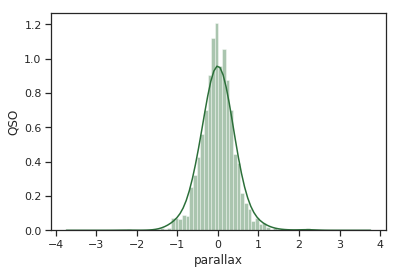

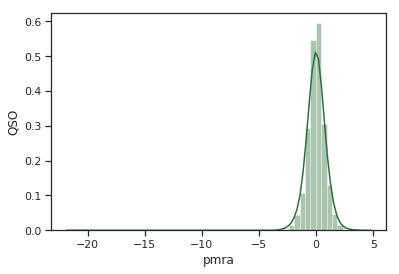

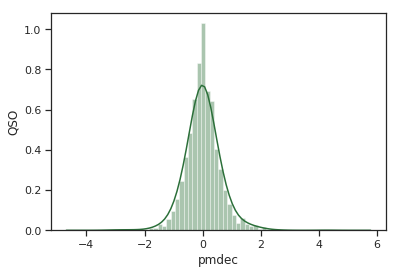

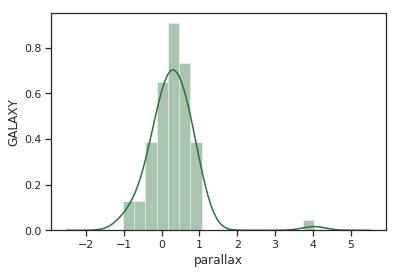

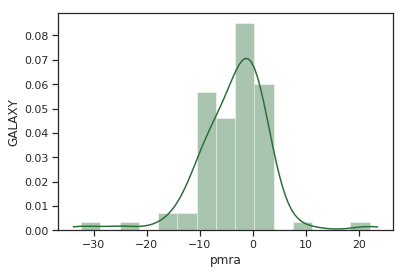

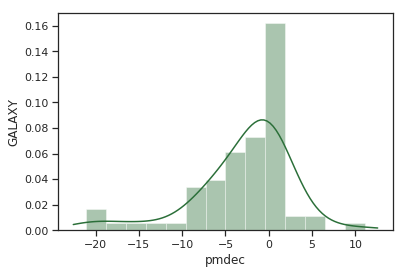

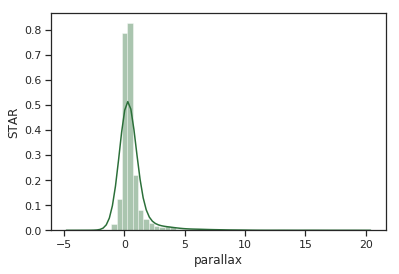

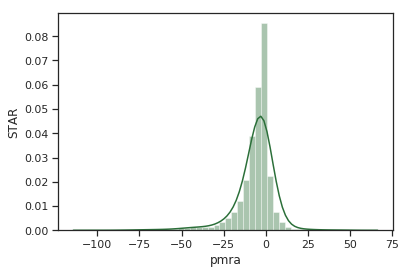

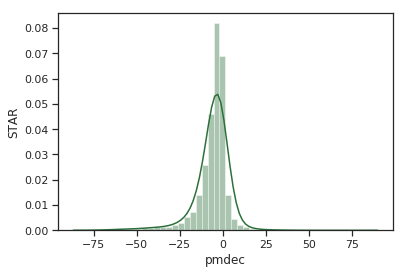

In [24]:
kids_x_sdss_x_gaia_clean = process_gaia(kids_x_sdss_x_gaia, parallax_error=1, pm_error=1)
print(describe_column(kids_x_sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(kids_x_sdss_x_gaia_clean)